In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from funciones_2 import *

# Detección de Fraude en Transacciones de Tarjetas de Crédito
El conjunto de datos de este problema comprende transacciones realizadas mediante tarjetas de crédito en un lapso de dos días, contabilizando 492 casos de fraude entre un total de 284,807 transacciones. Este dataset presenta un desequilibrio considerable, ya que la clase positiva (fraude) representa solo el 0.17 % del total de transacciones. Para una descripción más detallada del dataset, consulte el archivo credit card description.md.
En este problema, nuestro objetivo es desarrollar varios modelos para clasificar una transacción como fraudulenta o no, y luego evaluar la eficacia de cada uno. Para esto, el conjunto de datos se dividió previamente en uno de entrenamiento (credit card train.csv ), uno de validaci ́on (credit card valid.csv) y uno de testeo (credit card test.csv). Estos conjuntos permanecerán fijos durante el desarrollo de los modelos (es decir, en este problema tampoco aplicaremos validación cruzada). En caso de que sea necesario ajustar un hiperparámetro, esto se hará evaluando la métrica de performance sobre el conjunto de validación.

In [2]:
train = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/2 - Detección de Fraude en Transacciones de Tarjetas de Crédito/credit_card_train.csv')
test = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/2 - Detección de Fraude en Transacciones de Tarjetas de Crédito/credit_card_test.csv')
validation = pd.read_csv('/Users/maxi/Downloads/Actuales/ML/ML-TP3/Data/2 - Detección de Fraude en Transacciones de Tarjetas de Crédito/credit_card_valid.csv')

train = train.drop(columns=['Unnamed: 0'])
test = test.drop(columns=['Unnamed: 0'])
validation = validation.drop(columns=['Unnamed: 0'])
small_train = train.sample(frac=0.01, random_state=42)

# normalize all data
# min_max = get_min_max(train)
# train = min_max_normalize(train, min_max)
# test = min_max_normalize(test, min_max)
# validation = min_max_normalize(validation, min_max)

# if any column has a missing value replace with cero
# train = train.fillna(0)
# test = test.fillna(0)
# validation = validation.fillna(0)

X_train = train.drop(columns=['Class'])
y_train = train['Class'].values
min_max = get_min_max(X_train)
X_train = min_max_normalize(X_train, min_max)

X_test = test.drop(columns=['Class'])
X_test = min_max_normalize(X_test, min_max)
y_test = test['Class'].values

X_validation = validation.drop(columns=['Class'])
X_validation = min_max_normalize(X_validation, min_max)
y_validation = validation['Class'].values

X_small_train = small_train.drop(columns=['Class'])
min_max_small = get_min_max(X_small_train)
X_small_train = min_max_normalize(X_small_train, min_max_small)
y_small_train = small_train['Class'].values

small_test = test.sample(n=400, random_state=42)
X_small_test = small_test.drop(columns=['Class'])
X_small_test = min_max_normalize(X_small_test, min_max_small)
y_small_test = small_test['Class'].values


print("train shape: ", train.shape)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("\ntest shape: ", test.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

print("\nvalidation shape: ", validation.shape)
print("X_validation shape: ", X_validation.shape)
print("y_validation shape: ", y_validation.shape)


print("\nsmall_train shape: ", small_train.shape)
print("X_small_train shape: ", X_small_train.shape)
print("y_small_train shape: ", y_small_train.shape)

print("\nsmall_test shape: ", small_test.shape)
print("X_small_test shape: ", X_small_test.shape)
print("y_small_test shape: ", y_small_test.shape)


pd.set_option('display.max_columns', None)
# train.head()
# test.head()
# validation.head()
X_train.head()
# y_train

# # show all rows
# pd.set_option('display.max_rows', None)
# train


train shape:  (182276, 30)
X_train shape:  (182276, 29)
y_train shape:  (182276,)

test shape:  (56962, 30)
X_test shape:  (56962, 29)
y_test shape:  (56962,)

validation shape:  (45569, 30)
X_validation shape:  (45569, 29)
y_validation shape:  (45569,)

small_train shape:  (1823, 30)
X_small_train shape:  (1823, 29)
y_small_train shape:  (1823,)

small_test shape:  (400, 30)
X_small_test shape:  (400, 29)
y_small_test shape:  (400,)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log Amount
0,0.941734,0.782911,0.909137,0.293107,0.543964,0.501093,0.503523,0.786215,0.554781,0.626300,0.263870,0.691914,0.494630,0.661659,0.536183,0.612835,0.731578,0.657627,0.583415,0.417420,0.562997,0.532752,0.571920,0.516156,0.484601,0.361086,0.474047,0.221294,0.479477
1,0.993757,0.761124,0.839761,0.171783,0.542923,0.495208,0.497727,0.781152,0.656988,0.581761,0.266600,0.767997,0.646501,0.644198,0.453507,0.554126,0.738447,0.627360,0.651174,0.413277,0.563950,0.551968,0.573638,0.594169,0.529604,0.304695,0.471417,0.220281,0.548379
2,0.952650,0.733406,0.834551,0.442370,0.549495,0.583741,0.507348,0.789995,0.524787,0.636317,0.315836,0.746179,0.652622,0.651779,0.340989,0.656890,0.719420,0.567371,0.398403,0.443975,0.566853,0.446158,0.564886,0.271349,0.428398,0.331465,0.461730,0.224517,0.827724
3,0.992470,0.765403,0.851310,0.268587,0.544793,0.503069,0.497299,0.783952,0.582122,0.622780,0.336422,0.725219,0.453014,0.669215,0.375896,0.635319,0.718221,0.634418,0.595146,0.411174,0.557554,0.479407,0.579975,0.420591,0.474104,0.451943,0.465381,0.219633,0.452030
4,0.952184,0.776899,0.929027,0.251402,0.549190,0.504879,0.507572,0.782232,0.552305,0.613252,0.268485,0.701050,0.577061,0.642702,0.514074,0.635089,0.716361,0.626027,0.564629,0.418442,0.557123,0.484019,0.572565,0.466718,0.485272,0.429604,0.473978,0.218967,0.548379


In [3]:
# count values of each class in the train ser
unique, counts_i = np.unique(y_train, return_counts=True)
print("y_train class count: ", dict(zip(unique, counts_i)))
print(f"ratio of class 1 to class 0: {(counts_i[1]/counts_i[0])*100:.2f}%")

y_train class count:  {0: 181956, 1: 320}
ratio of class 1 to class 0: 0.18%


El dataset de entrenamiento se encuentra significativamente sezgado. Solo un $0.18\%$ del dataset son equivalentes a $1$.

## (a)
Implementar los siguientes clasificadores sobre el conjunto de datos de entrenamiento sin aplicar ninguna técnica de re-balanceo, y para cada uno reportar la matriz de confusión, accuracy, precision, recall, curva ROC y área bajo la curva ROC (AUC-ROC), curva PRC (Precision-Recall Curve) y área bajo la curva PRC (AU-PRC) sobre el conjunto de validación:

 - Red neuronal densamente conectada con una capa oculta de 16 nodos y función de activación sigmoide. Entrenar durante 150 epochs utilizando el optimizador ADAM con un learning rate de 0.001 y un batch size de 2048, y la entrop ́ıa cruzada binaria como función de costo. Si quiere explorar diferentes configuraciones, y quedarse con la mejor, lo puede hacer.
Opcional: Implementar la técnica de “Early Stopping” monitoreando AU-PRC (área bajo la curva Precision-Recall) con una paciencia de 10 epochs.

 - Bosque aleatorio (Random Forest) con 20 árboles, utilizando la entropía como criterio de división, estableciendo una profundidad máxima de 10 para cada árbol. Si quiere explorar diferentes configuraciones, y quedarse con la mejor, lo puede hacer.

### Red Neuronal 

In [17]:
# fit MLP model
X_train.shape[1]
mlp = MLP(X_train.shape[1], [29, 16, 1], ['sigmoid', 'sigmoid', 'sigmoid'], verbose=False)

# prueba = list(zip(X_train.values, y_train))
# prueba

train_losses_1, test_losses_1 = mlp.fit(list(zip(X_train.values, y_train)), 
                                        list(zip(X_validation.values, y_validation)), 
                                        2048, 
                                        alpha=0.001, 
                                        max_epochs=50)



  0%|          | 0/50 [00:00<?, ?it/s]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:174: RuntimeWarning: invalid value encountered in log
  return -np.mean(y * np.log(a_out) + (1 - y) * np.log(1 - a_out))
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:148: RuntimeWarning: overflow encountered in exp
  return lambda z : 1 / (1 + np.exp(-z))
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:167: RuntimeWarning: overflow encountered in multiply
  return lambda z : z * (1 - z)
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:270: RuntimeWarning: invalid value encountered in add
  nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, d_nabla_b)]
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:271: RuntimeWarning: invalid value encountered in add
  nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, d_nabla_w)]
100%|██████████| 50/50 [10:40<00:00, 12.82s/it]


Uso $50$ epochs en vez de 150, porque anda muy lento. Además hay warnings de overflow en distintas operaciones de la clase que no logré identificar y resolver.

In [18]:
print(f"num layers: {mlp.num_layers}")
print(f"layers: {mlp.layers}")
print(f"activations: {mlp.activations}")

num layers: 3
layers: [29, 16, 1]
activations: ['sigmoid', 'sigmoid', 'sigmoid']


In [20]:
y_mlp_valid_pred = mlp.predict(X_validation)

In [21]:
TP, TN, FP, FN = confusion_matrix(y_validation, y_mlp_valid_pred, model_name='MLP')

A partir de este resultado noto que mi modelo está prediciendo siempre el valor $0$. Esto puede ser causado por el hecho de que el dataset de entrenamiento se encuentra sezgado, como se explicó anteriormente. Pero lo mas probable es que haya un error en la implementación del modelo.

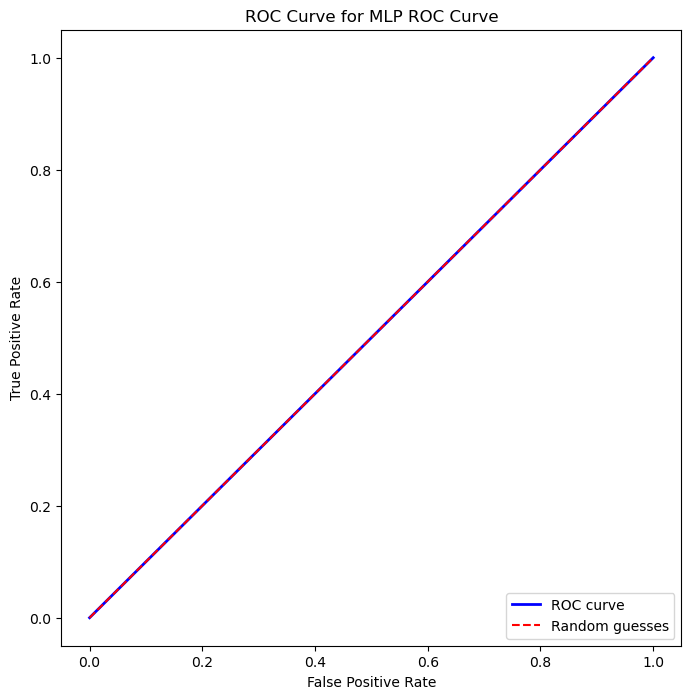

MLP AUC-ROC: 0.5


In [84]:
fpr_mlp, tpr_mlp = roc_curve(y_validation, mlp, X_validation, plot=True, model_name='MLP')
mlp_auc_roc = auc_roc(fpr_mlp, tpr_mlp)
print(f"MLP AUC-ROC: {mlp_auc_roc}")

En este gráfico se puede observar que la ROC correspondiente a nuestro modelo es igual al de un modelo que realiza predicciones arbitrarias. Esto se debe a que el $TP$ rate es $0$, sin importar el threshold. 

### Pruebo con un Árbol antes de hacer el Random Forest

In [4]:
dec_tree = DecisionTree(min_samples_leaf=2, max_depth=5, min_information_gain=0)
dec_tree.fit(X_train.values, y_train)
y_dec_tree_valid_pred = dec_tree.predict(X_validation.values)

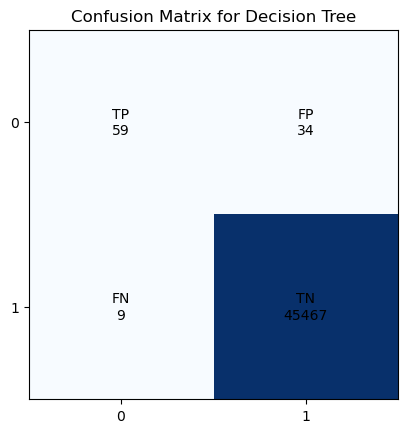

In [18]:
TP, TN, FP, FN = confusion_matrix(y_validation, y_dec_tree_valid_pred, model_name='Decision Tree')

Estos resultados representan una mejora importante sobre el modelo anterior. Esto significa que el Random Forest debería dar mejores resultados todavía.

### Random Forest

In [20]:
random_forest = RandomForest(n_trees=20, max_depth=10, min_samples_leaf=2, min_information_gain=0)
random_forest.fit(X_train.values, y_train)
y_random_forest_valid_pred = random_forest.predict(X_validation.values)

100%|██████████| 20/20 [11:11<00:00, 33.57s/it]


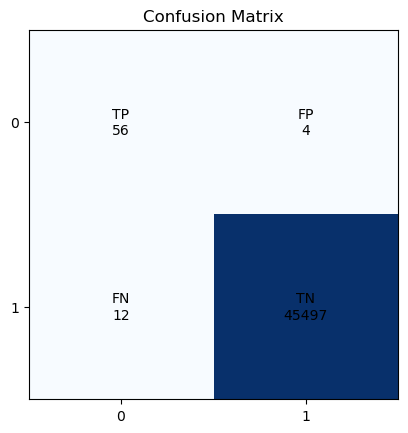

Random Forest Accuracy: 0.9996
Random Forest Precision: 0.933
Random Forest Recall: 0.824


In [27]:
TP_rf, TN_rf, FP_rf, FN_rf = confusion_matrix(y_validation, y_random_forest_valid_pred)
accuracy_rf = accuracy(y_validation, y_random_forest_valid_pred)
precision_rf = precision(y_validation, y_random_forest_valid_pred)
recall_rf = recall(y_validation, y_random_forest_valid_pred)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.3f}")
print(f"Random Forest Recall: {recall_rf:.3f}")

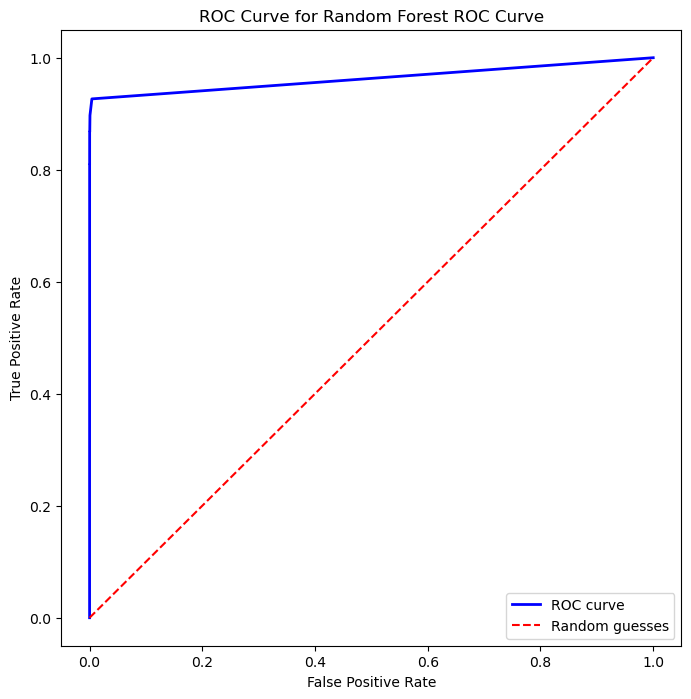

Random Forest AUC-ROC: 0.9629765732362702


In [113]:
fpr_rf, tpr_rf = roc_curve(y_validation, random_forest, X_validation, plot=True, model_name='Random Forest')
rf_auc_roc = auc_roc(fpr_rf, tpr_rf)
print(f"Random Forest AUC-ROC: {rf_auc_roc}")

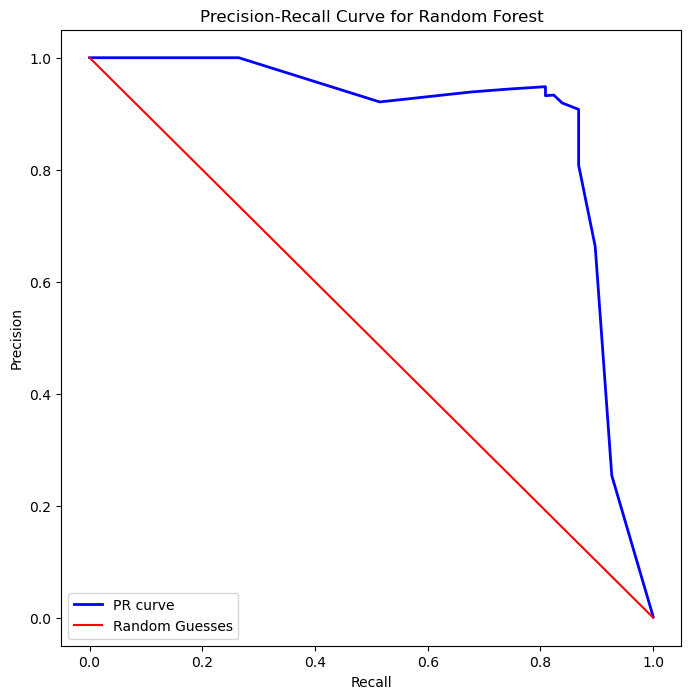

Random Forest AUC-PR: 0.8785264983425501


In [30]:
RecallRF, PrecisionRF = pr_curve(y_validation, random_forest, X_validation, plot=True, model_name='Random Forest')   
auc_pr_rf = auc_pr(RecallRF, PrecisionRF)
print(f"Random Forest AUC-PR: {auc_pr_rf}")

Estos resultados ya presentan un buen modelo predictivo, sin embargo, dado el desbalance entre las clases sospecho que estos resultados deberían mejorar al emplear técnicas de re-balanceo.

## (b)
Volver a entrenar ambos modelos (red neuronal y bosque aleatorio), aplicando cada una de las siguientes técnicas de re-balanceo. Para cada modelo, y cada tecnica de re-balanceo, reportar las métricas de performance mencionadas en el inciso anterior.

 - Undersampling: eliminar muestras de la clase mayoritaria de manera aleatoria hasta que ambas clases tengan igual proporción.

 - Oversampling by duplication: duplicar muestras de la clase minoritaria de manera aleatoria, hasta que que ambas clases tengan igual proporción.

 - Cost re-weighting: en la función de costo, multiplicar los terminos que dependen de las muestras de la clase minoritaria por un factor $C = \frac{\pi _2} {\pi _1}$
 - SMOTE (Synthetic Minority Oversampling Technique): hasta que ambas clases tengan igual proporción.
 - Opcional: Explorar distintas configuraciones de red neuronal (diferente nu ́mero de capas, unidades ocultas, optimizador, learning rate, batch size) y/o del bosque aleatorio y reportar cual cree que es “el mejor”.

### Random Forest with Undersampling 

In [20]:
# undersample the train set
X_train_undersampled, y_train_undersampled = undersample(X_train, y_train)

# count values of each class in the train ser
unique, counts = np.unique(y_train_undersampled, return_counts=True)
print("y_train_undersampled class count: ", dict(zip(unique, counts)))

y_train_undersampled class count:  {0: 320, 1: 320}


In [12]:
random_forest_u = RandomForest(n_trees=20, max_depth=10, min_samples_leaf=2, min_information_gain=0)
random_forest_u.fit(X_train_undersampled, y_train_undersampled)
y_random_forest_u_valid_pred = random_forest_u.predict(X_validation.values)

100%|██████████| 20/20 [00:20<00:00,  1.03s/it]


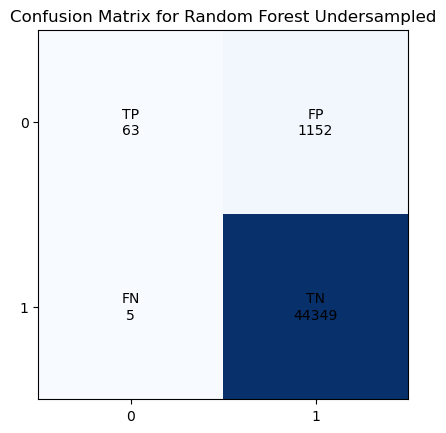

Random Forest Undersampled Accuracy: 0.9746
Random Forest Undersampled Precision: 0.052
Random Forest Undersampled Recall: 0.926


In [13]:
TP_rf_u, TN_rf_u, FP_rf_u, FN_rf_u = confusion_matrix(y_validation, y_random_forest_u_valid_pred, model_name='Random Forest Undersampled')
accuracy_rf_u = accuracy(y_validation, y_random_forest_u_valid_pred)
precision_rf_u = precision(y_validation, y_random_forest_u_valid_pred)
recall_rf_u = recall(y_validation, y_random_forest_u_valid_pred)

print(f"Random Forest Undersampled Accuracy: {accuracy_rf_u:.4f}")
print(f"Random Forest Undersampled Precision: {precision_rf_u:.3f}")
print(f"Random Forest Undersampled Recall: {recall_rf_u:.3f}")

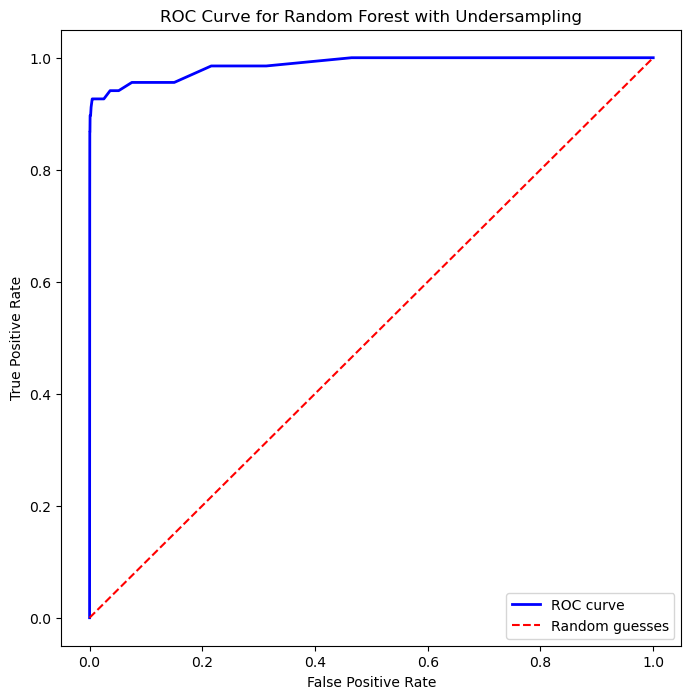

Random Forest with Undersampling AUC-ROC: 0.9872604609853436


In [14]:
fpr_rf_u, tpr_rf_u = roc_curve(y_validation, random_forest_u, X_validation, plot=True, model_name='Random Forest with Undersampling')
rf_u_auc_roc = auc_roc(fpr_rf_u, tpr_rf_u)
print(f"Random Forest with Undersampling AUC-ROC: {rf_u_auc_roc}")

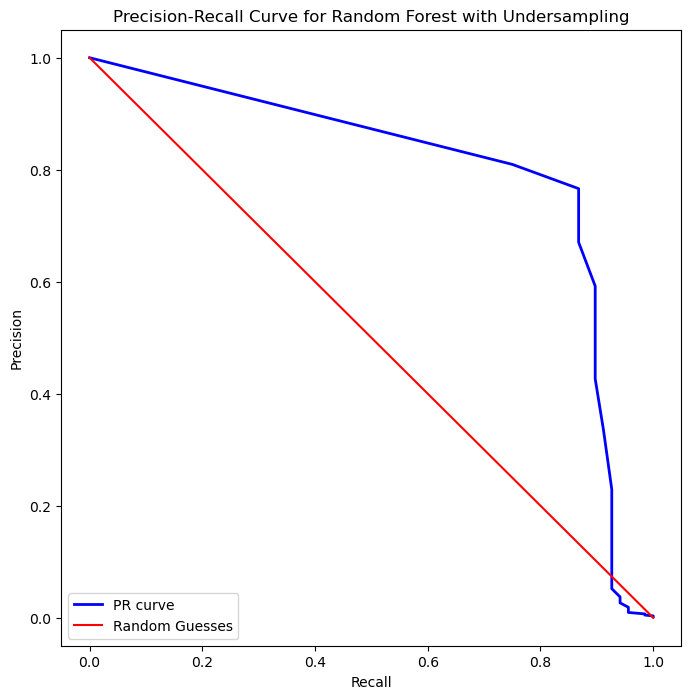

Random Forest with Undersampling AUC-PR: 0.7985039027995866


In [15]:
RecallRF_u, PrecisionRF_u = pr_curve(y_validation, random_forest_u, X_validation, plot=True, model_name='Random Forest with Undersampling')
auc_pr_rf_u = auc_pr(RecallRF_u, PrecisionRF_u)
print(f"Random Forest with Undersampling AUC-PR: {auc_pr_rf_u}")

En este caso el resultado de la AUC-ROC es $0.989$, lo cual implica una mejora respecto al mismo modelo implementado al dataset original. Esto es una sorpresa ya que al eliminar muestras de la clase mayoritaria hasta tener la misma cantidad en ambas clases, nos quedamos con un dataset de entrenamiento pequeño de solo $640$ datos (que resulta todavía mas chico al compararlo con el dataset de validación de $45569$ datos). 

Por otro lado el AUC-PR presenta un resultado menor, es decir que empeoró respecto del modelo base. La métrica que se vió mas afectada en este caso fue la precisión que cayó a un $5%$, esto se puede ver en la confusion matrix donde se puede observar un aumento significativo en los $FP$ que pasaron de $4$ a $1070$. 

En conclusión este modelo podría ponerse en producción si no es preocupante el hecho de haber catalogado muchas transacciones como casos de fraude incorrectamente. Es decir que este modelo va a predecir que muchas transacciones son fraudes, de estas muchas van a ser erróneas. Sin embargo de las que el modelo predijo como transacciones 'correctas' pocas van a ser erróneas y esto es probablemente lo mas importante en este caso. 

### MLP with Undersampling

In [22]:
mlp_u = MLP(X_train_undersampled.shape[1], [29, 16, 1], ['sigmoid', 'sigmoid', 'sigmoid'], verbose=False)

train_losses_u, test_losses_u = mlp_u.fit(list(zip(X_train_undersampled, y_train_undersampled)),
                                            list(zip(X_validation.values, y_validation)),
                                            2048,
                                            alpha=0.001,
                                            max_epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:352: RuntimeWarning: invalid value encountered in log
  return -np.mean(y * np.log(a_out) + (1 - y) * np.log(1 - a_out))
100%|██████████| 50/50 [01:23<00:00,  1.66s/it]


In [26]:
y_mlp_u_valid_pred = mlp_u.predict(X_validation)

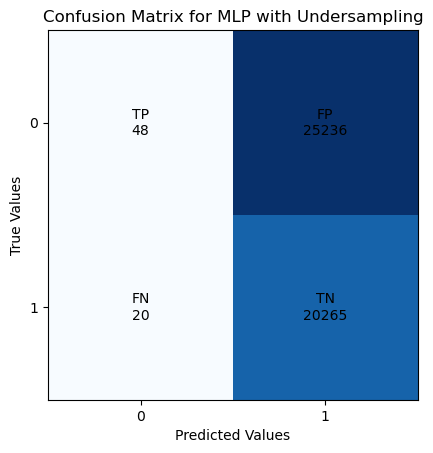

MLP with Undersampling Accuracy: 0.446
MLP with Undersampling Precision: 0.002
MLP with Undersampling Recall: 0.706


In [28]:
TP_mlp_u, TN_mlp_u, FP_mlp_u, FN_mlp_u = confusion_matrix(y_validation, y_mlp_u_valid_pred, model_name='MLP with Undersampling')
accuracy_mlp_u = accuracy(y_validation, mlp_u.predict(X_validation))
precision_mlp_u = precision(y_validation, mlp_u.predict(X_validation))
recall_mlp_u = recall(y_validation, mlp_u.predict(X_validation))

print(f"MLP with Undersampling Accuracy: {accuracy_mlp_u:.3f}")
print(f"MLP with Undersampling Precision: {precision_mlp_u:.3f}")
print(f"MLP with Undersampling Recall: {recall_mlp_u:.3f}")

En este caso veo que el modelo MLP predice valores de ambas clases, es decir que en el caso anterior el modelo solo predecía valores $0$ por el desbalance del dataset. Por otro lado, los resultados que se obtuvieron son muy inferiores a los del Random Forest, en todo aspecto. Antes de desarrollar las otras métricas vamos a emplear el mismo modelo pero con las 150 epochs.

In [30]:
mlp_u2 = MLP(X_train_undersampled.shape[1], [29, 16, 1], ['sigmoid', 'sigmoid', 'sigmoid'], verbose=False)

train_losses_u2, test_losses_u2 = mlp_u.fit(list(zip(X_train_undersampled, y_train_undersampled)),
                                            list(zip(X_validation.values, y_validation)),
                                            2048,
                                            alpha=0.001,
                                            max_epochs=150)

  0%|          | 0/150 [00:00<?, ?it/s]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:352: RuntimeWarning: invalid value encountered in log
  return -np.mean(y * np.log(a_out) + (1 - y) * np.log(1 - a_out))
 47%|████▋     | 70/150 [01:50<02:07,  1.59s/it]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:326: RuntimeWarning: overflow encountered in exp
  return lambda z : 1 / (1 + np.exp(-z))
 57%|█████▋    | 86/150 [02:17<01:46,  1.67s/it]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:345: RuntimeWarning: overflow encountered in multiply
  return lambda z : z * (1 - z)
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:448: RuntimeWarning: invalid value encountered in add
  nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, d_nabla_b)]
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:449: RuntimeWarning: invalid value encountered in add
  nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, d_nabla_w)]
1

In [32]:
y_mlp_u_valid_pred = mlp_u.predict(X_validation)

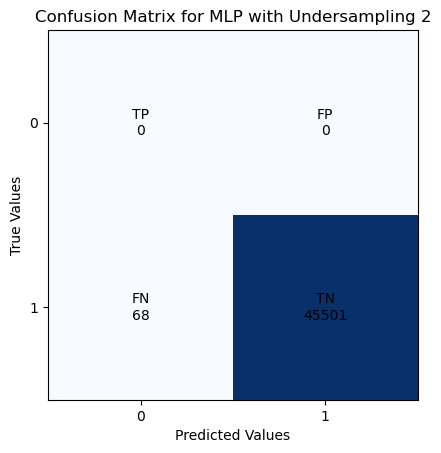

MLP with Undersampling 2 Accuracy: 0.999
MLP with Undersampling 2 Precision: nan
MLP with Undersampling 2 Recall: 0.000


/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:180: RuntimeWarning: invalid value encountered in scalar divide
  return TP / (TP + FP)


In [33]:
TP_mlp_u2, TN_mlp_u2, FP_mlp_u2, FN_mlp_u2 = confusion_matrix(y_validation, y_mlp_u_valid_pred, model_name='MLP with Undersampling 2')
accuracy_mlp_u2 = accuracy(y_validation, mlp_u.predict(X_validation))
precision_mlp_u2 = precision(y_validation, mlp_u.predict(X_validation))
recall_mlp_u2 = recall(y_validation, mlp_u.predict(X_validation))

print(f"MLP with Undersampling 2 Accuracy: {accuracy_mlp_u2:.3f}")
print(f"MLP with Undersampling 2 Precision: {precision_mlp_u2:.3f}")
print(f"MLP with Undersampling 2 Recall: {recall_mlp_u2:.3f}")

En este caso, la única diferencia fue que se usó el modelo con las 150 épocas y nuevamente todas las predicciones fueron negativas (predijo siempre el valor $0$ para todas las transacciones). Dadas estas condiciones no evalúo mas métricas porque ya se dispone suficiente información de la matriz de confusión.

### Oversampling

In [35]:
# oversample the train set
X_train_oversampled, y_train_oversampled = oversample(X_train, y_train)

# count values of each class in the train ser
unique, counts = np.unique(y_train_oversampled, return_counts=True)
print("y_train_oversampled class count: ", dict(zip(unique, counts)))

y_train_oversampled class count:  {0: 181956, 1: 181956}


In [6]:
random_forest_o = RandomForest(n_trees=20, max_depth=10, min_samples_leaf=2, min_information_gain=0)
random_forest_o.fit(X_train_oversampled, y_train_oversampled)
y_random_forest_o_valid_pred = random_forest_o.predict(X_validation.values)

100%|██████████| 20/20 [20:21<00:00, 61.07s/it]


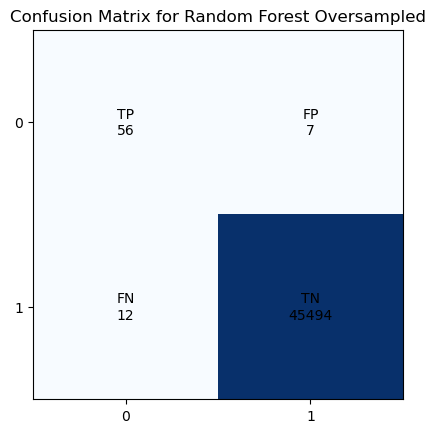

Random Forest Oversampled Accuracy: 0.9996
Random Forest Oversampled Precision: 0.889
Random Forest Oversampled Recall: 0.824


In [7]:
TP_o, TN_o, FP_o, FN_o = confusion_matrix(y_validation, y_random_forest_o_valid_pred, model_name='Random Forest Oversampled')
accuracy_rf_o = accuracy(y_validation, y_random_forest_o_valid_pred)
precision_rf_o = precision(y_validation, y_random_forest_o_valid_pred)
recall_rf_o = recall(y_validation, y_random_forest_o_valid_pred)

print(f"Random Forest Oversampled Accuracy: {accuracy_rf_o:.4f}")
print(f"Random Forest Oversampled Precision: {precision_rf_o:.3f}")
print(f"Random Forest Oversampled Recall: {recall_rf_o:.3f}")

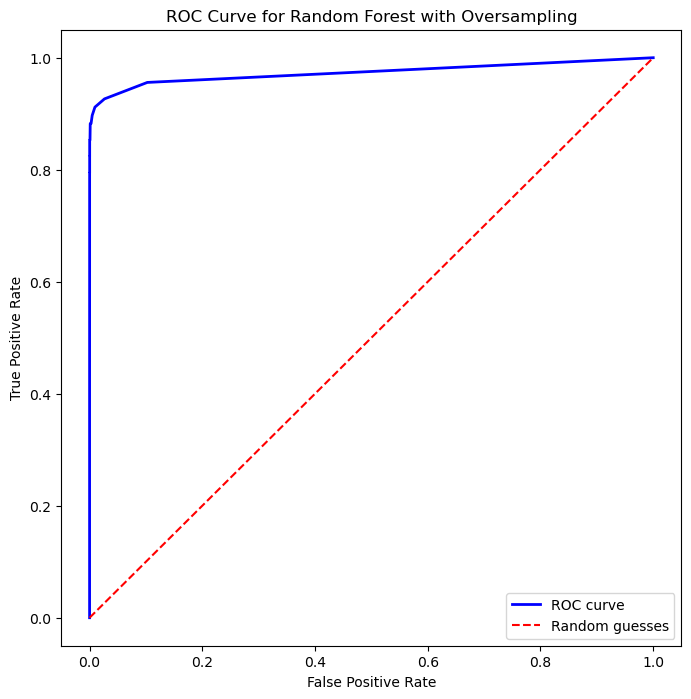

Random Forest with Oversampling AUC-ROC: 0.973312318927703


In [8]:
fpr_rf_o, tpr_rf_o = roc_curve(y_validation, random_forest_o, X_validation, plot=True, model_name='Random Forest with Oversampling')
rf_o_auc_roc = auc_roc(fpr_rf_o, tpr_rf_o)
print(f"Random Forest with Oversampling AUC-ROC: {rf_o_auc_roc}")

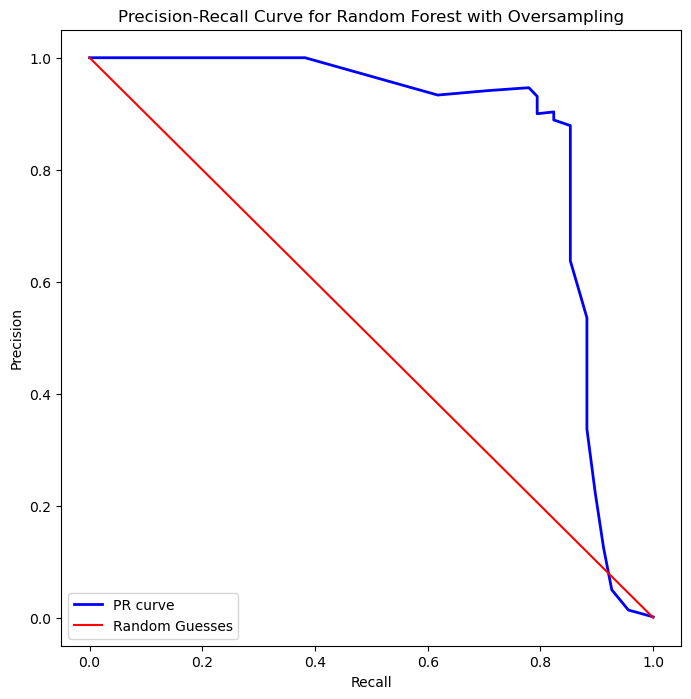

Random Forest with Oversampling AUC-PR: 0.8537504191897556


In [9]:
PrecisionRF_o, RecallRF_o = pr_curve(y_validation, random_forest_o, X_validation, plot=True, model_name='Random Forest with Oversampling')
auc_pr_rf_o = auc_pr(RecallRF_o, PrecisionRF_o)
print(f"Random Forest with Oversampling AUC-PR: {auc_pr_rf_o}")

En este caso los resultados son mas balanceados que en el caso anterior, pero si comparamos con los resultados del modelo Random Forest base, son levemente peores, por lo que es conveniente usar el otro además de ser menos costoso. Esperaba mejores resultados de este modelo.

### MLP with Oversampling

In [37]:
mlp_o = MLP(X_train_oversampled.shape[1], [29, 16, 1], ['sigmoid', 'sigmoid', 'sigmoid'], verbose=False)

train_losses_o, test_losses_o = mlp_o.fit(list(zip(X_train_oversampled, y_train_oversampled)),
                                            list(zip(X_validation.values, y_validation)),
                                            2048,
                                            alpha=0.001,
                                            max_epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:352: RuntimeWarning: invalid value encountered in log
  return -np.mean(y * np.log(a_out) + (1 - y) * np.log(1 - a_out))
  2%|▏         | 1/50 [00:21<17:33, 21.51s/it]/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:326: RuntimeWarning: overflow encountered in exp
  return lambda z : 1 / (1 + np.exp(-z))
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:345: RuntimeWarning: overflow encountered in multiply
  return lambda z : z * (1 - z)
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:448: RuntimeWarning: invalid value encountered in add
  nabla_b = [nb + dnb for nb, dnb in zip(nabla_b, d_nabla_b)]
/Users/maxi/Downloads/Actuales/ML/ML-TP3/Problema 2/funciones_2.py:449: RuntimeWarning: invalid value encountered in add
  nabla_w = [nw + dnw for nw, dnw in zip(nabla_w, d_nabla_w)]
100%|██████████| 50/50 [18:20<00:00, 22.01s/it]


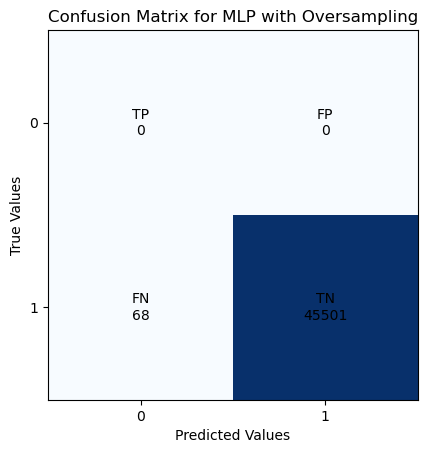

In [40]:
y_mlp_o_valid_pred = mlp_o.predict(X_validation)
TP_mlp_o, TN_mlp_o, FP_mlp_o, FN_mlp_o = confusion_matrix(y_validation, y_mlp_o_valid_pred, model_name='MLP with Oversampling')



Nuevamente obtengo solo predicciones de valor $1$, por lo que descarto el modelo.

### Cost re-weighting

In [4]:
C = counts_i[0]/counts_i[1]

random_forest_crw = RandomForest(n_trees=20, max_depth=10, min_samples_leaf=2, min_information_gain=0, C=C)
random_forest_crw.fit(X_train.values, y_train)
y_random_forest_crw_valid_pred = random_forest_crw.predict(X_validation.values)

100%|██████████| 20/20 [12:50<00:00, 38.55s/it]


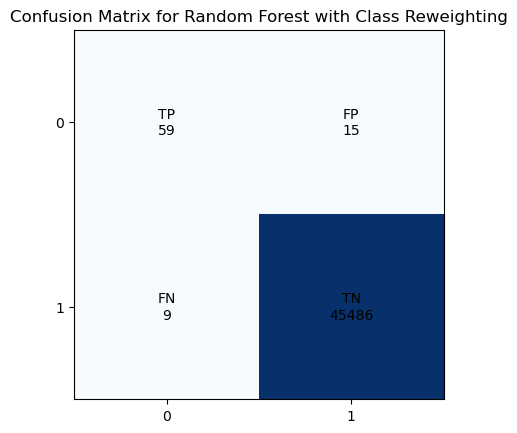

Random Forest with Class Reweighting Accuracy: 0.9995
Random Forest with Class Reweighting Precision: 0.797
Random Forest with Class Reweighting Recall: 0.868


In [5]:
TP_crw, TN_crw, FP_crw, FN_crw = confusion_matrix(y_validation, y_random_forest_crw_valid_pred, model_name='Random Forest with Class Reweighting')
accuracy_rf_crw = accuracy(y_validation, y_random_forest_crw_valid_pred)
precision_rf_crw = precision(y_validation, y_random_forest_crw_valid_pred)
recall_rf_crw = recall(y_validation, y_random_forest_crw_valid_pred)

print(f"Random Forest with Class Reweighting Accuracy: {accuracy_rf_crw:.4f}")
print(f"Random Forest with Class Reweighting Precision: {precision_rf_crw:.3f}")
print(f"Random Forest with Class Reweighting Recall: {recall_rf_crw:.3f}")

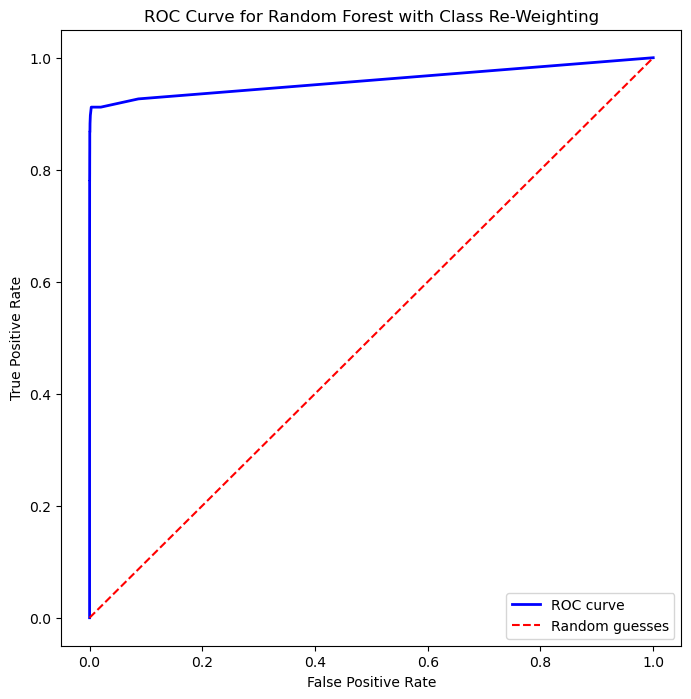

Random Forest with Class Re-Weighting AUC-ROC: 0.9591841549700911


In [6]:
fpr_rf_crw, tpr_rf_crw = roc_curve(y_validation, random_forest_crw, X_validation, plot=True, model_name='Random Forest with Class Re-Weighting')
rf_crw_auc_roc = auc_roc(fpr_rf_crw, tpr_rf_crw)
print(f"Random Forest with Class Re-Weighting AUC-ROC: {rf_crw_auc_roc}")

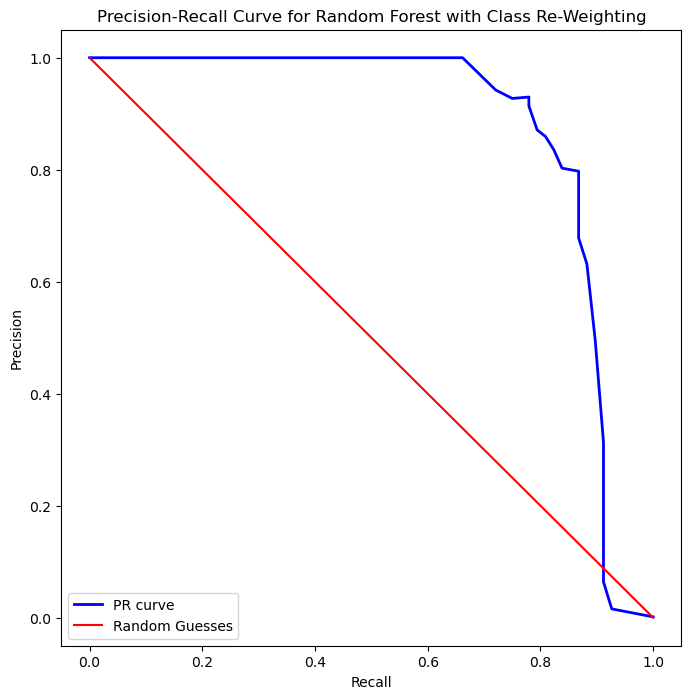

Random Forest with Class Re-Weighting AUC-PR: 0.8682371071501913


In [7]:
PrecisionRF_crw, RecallRF_crw = pr_curve(y_validation, random_forest_crw, X_validation, plot=True, model_name='Random Forest with Class Re-Weighting')
auc_pr_rf_crw = auc_pr(RecallRF_crw, PrecisionRF_crw)
print(f"Random Forest with Class Re-Weighting AUC-PR: {auc_pr_rf_crw}")

El resultado en este caso es bueno pero sigue rindiendo levemente por debajo del modelo original en la mayoría de las métricas consideradas. La única mejora en este caso es que bajó el $FN$ de $12$ a $9$, es decir que bajó la cantidad de casos que el modelo predijo como aceptables y eran fraudes (creería que este es el valor que mas interesa minimizar en este caso). 

### SMOTE

In [12]:
ratio_majority_minority = int(counts_i[0]/counts_i[1])
print(f"ratio_majority_minority: {ratio_majority_minority}")

X_smote, y_smote = smote(X_train.values, y_train, k=5, seed=42, oversampling_ratio=(ratio_majority_minority-1))
# count values of each class in the modified train set
unique_s, counts_s = np.unique(y_smote, return_counts=True)
print("y_train_oversampled class count: ", dict(zip(unique_s, counts_s)))

ratio_majority_minority: 568
y_train_oversampled class count:  {0: 181956, 1: 181760}


In [13]:
random_forest_smote = RandomForest(n_trees=20, max_depth=10, min_samples_leaf=2, min_information_gain=0)
random_forest_smote.fit(X_smote, y_smote)
y_random_forest_smote_valid_pred = random_forest_smote.predict(X_validation.values)

100%|██████████| 20/20 [20:07<00:00, 60.36s/it]


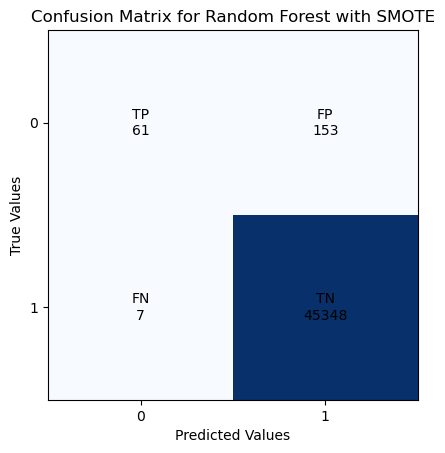

Random Forest with SMOTE Accuracy: 0.9965
Random Forest with SMOTE Precision: 0.285
Random Forest with SMOTE Recall: 0.897


In [18]:
TP_smote, TN_smote, FP_smote, FN_smote = confusion_matrix(y_validation, y_random_forest_smote_valid_pred, model_name='Random Forest with SMOTE')
accuracy_rf_smote = accuracy(y_validation, y_random_forest_smote_valid_pred)
precision_rf_smote = precision(y_validation, y_random_forest_smote_valid_pred)
recall_rf_smote = recall(y_validation, y_random_forest_smote_valid_pred)

print(f"Random Forest with SMOTE Accuracy: {accuracy_rf_smote:.4f}")
print(f"Random Forest with SMOTE Precision: {precision_rf_smote:.3f}")
print(f"Random Forest with SMOTE Recall: {recall_rf_smote:.3f}")

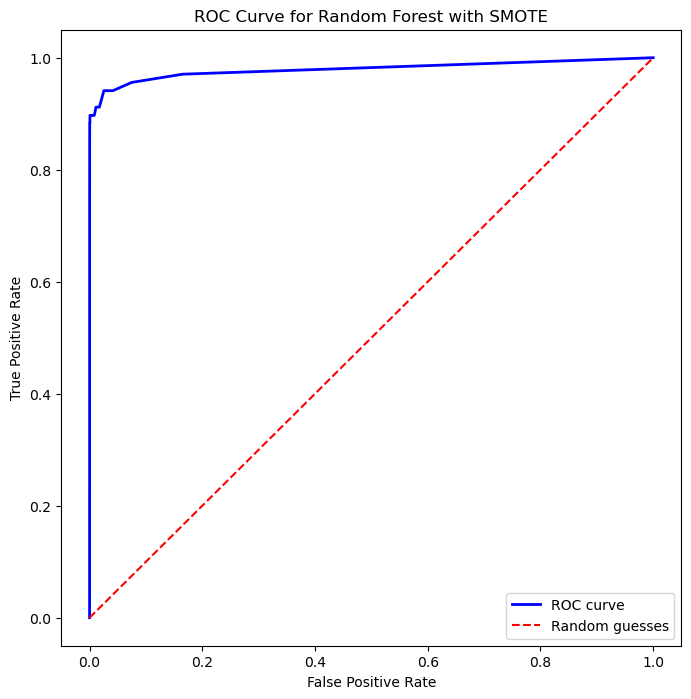

Random Forest with SMOTE AUC-ROC: 0.9794169035716087


In [16]:
fpr_smote, tpr_smote = roc_curve(y_validation, random_forest_smote, X_validation, plot=True, model_name='Random Forest with SMOTE')
rf_smote_auc_roc = auc_roc(fpr_smote, tpr_smote)
print(f"Random Forest with SMOTE AUC-ROC: {rf_smote_auc_roc}")

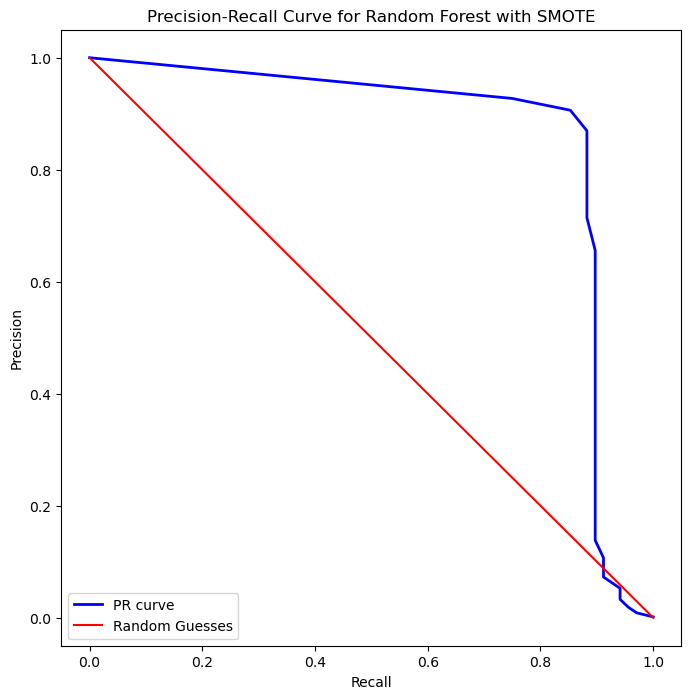

Random Forest with SMOTE AUC-PR: 0.8561741472130406


In [17]:
PrecisionRF_smote, RecallRF_smote = pr_curve(y_validation, random_forest_smote, X_validation, plot=True, model_name='Random Forest with SMOTE')
auc_pr_rf_smote = auc_pr(RecallRF_smote, PrecisionRF_smote)
print(f"Random Forest with SMOTE AUC-PR: {auc_pr_rf_smote}")

Usando SMOTE se obtuvieron buenos resultados en general. Se puede observar que son solo 7 los casos de fraude que no fueron identificados, en otras palabras $\frac{FN}{TP+FN}=10,3\%$ es un porcentaje relativamente bajo, solo se obtuvo un mejor resultado en el caso de Undersampling. 

En conclusión, si se prioriza no dejar pasar casos de fraude, pero también importan las otras métricas, elegiría esta estrategia.

## (c)
Sea un problema de clasifiación binaria, donde el proceso estocástico que genera los datos tiene una distribución a posteriori $P(C_j/x)$ tal que para N suficientemente grande las clases no son linealmente separables en el espacio de features (es decir, las muestras de las dos clases tienen algun grado de solapamiento cuando son proyectadas sobre el espacio de features). Sean $π1 = P(C_1)$ y $π2 = P(C_2)$ las probabilidades marginales de que el proceso genere una muestra de la clase 1 y la clase 2, respectivamente, explicar por qué si utilizamos regresión logística binaria, sin aplicar ninguna técnica de re-balanceo, a medida que $π1$ tiende a 0 y con $N$ suficientemente grande, el accuracy tiende a 1 mientras que el precision tiende a 0.

NOTA: Este resultado es general, y aplica a cualquier clasificador “no-sezgado” (como los que vimos en clase), no solamente a regresión log ́ıstica.
